<a href="https://colab.research.google.com/github/jyotidabass/Image-smoothing/blob/main/Image_smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

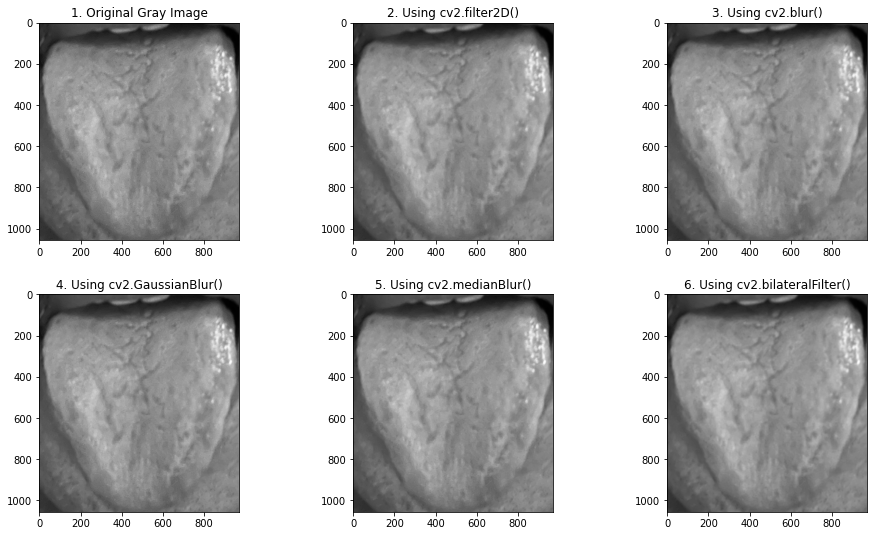

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

kernel = np.ones((5,5),np.float32)/25 #for cv2.filter2D()

class smoothing(object):

    def read_image(self,image):
        image_read = cv2.imread('/content/8F28F524-4ADC-4D6A-B212-CD01C180EC0F - Anil Chopra.jpeg')
        image_gray = cv2.cvtColor(image_read,cv2.COLOR_BGR2GRAY)

        return image_gray
    '''
    cv2.filter2D() - to convolve the kernel with an image
    '''
    def filter2D(self,image_gray):
        image_result = cv2.filter2D(image_gray,-1,kernel)
        return image_result
    '''
    Blurring - Low pass filter kernel 
        - removal of noise
        - removes high frequency content (noise, edges)
        - 4 types - averaging, median, gaussian, bilateral
    '''
    '''
    cv2.blur() or cv2.boxFilter() - convolving image with normalized box filter
    - takes avg of pixels under kernel area and replaces central element with this average
    '''
    def averaging(self,image_gray):
        image_result = cv2.blur(image_gray,(5,5))
        return image_result
    '''
    cv2.GaussianBlur() - remove gaussian noise from the noise
    Instead of box filter with equal coefficients, we specify the width and height of kernel (positive and odd)
    SigmaX Gaussian kernel standard deviation in X direction and SigmaY in Y-direction
    Gaussian filter takes the a neighborhood around the pixel and finds its Gaussian weighted average
    '''
    def gaussian(self,image_gray):
        image_result = cv2.GaussianBlur(image_gray,(5,5),sigmaX=0)
        return image_result
    '''
    cv2.meadianBlur() - computes median of all pixels under the kernel and the central pixel
    is replaced with this median value.
    Effective in removing salt and pepper noise - reduces noise effectively.
    '''
    def median(self,image_gray):
        image_result = cv2.medianBlur(image_gray,5)
        return image_result
    
    '''
    cv2.bilateralFilter() - noise removal while preserving edges
    bilateral filter = Gaussian filter + multiplicative gaussian filter component which is a function of pixel intensity differences.
    - sptail neigbors + intensity domain
    '''
    def bilateral(self,image_gray):
        image_result = cv2.bilateralFilter(image_gray,9,75,75)
        return image_result

_inst = smoothing()
read_image = _inst.read_image
filter2D = _inst.filter2D
averaging = _inst.averaging
gaussian = _inst.gaussian
median = _inst.median
bilateral = _inst.bilateral

image_path = 'image_tumor.jpg'
tumor = read_image(image_path)

filter2D = filter2D(tumor)
averaging = averaging(tumor)
gaussian = gaussian(tumor)
median = median(tumor)
bilateral = bilateral(tumor)

#####################################
## Plotting all stages of image blurring ##
#####################################
fig, axs = plt.subplots(2,3, figsize=(15, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .25, wspace=.5)

axs = axs.ravel()

axs[0].imshow(tumor,'gray')
axs[0].set_title('1. Original Gray Image')
axs[1].imshow(filter2D,'gray')
axs[1].set_title('2. Using cv2.filter2D()')
axs[2].imshow(averaging,'gray')
axs[2].set_title('3. Using cv2.blur()')
axs[3].imshow(gaussian,'gray')
axs[3].set_title('4. Using cv2.GaussianBlur()')
axs[4].imshow(median,'gray')
axs[4].set_title('5. Using cv2.medianBlur()')
axs[5].imshow(bilateral,'gray')
axs[5].set_title('6. Using cv2.bilateralFilter()')

plt.show()